## Libraries And Utilities

In [2]:
#Importing modules

import pandas as pd  #Bring Python-based data analysis toolkit into environment
import numpy as np   #Bring the NumPy library into environment
import re            #Module provides regular expression matching operations

from ast import literal_eval #evaluates an expression node or a string consisting of a Python literal or container display

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier #Decision tree regression model
from sklearn.linear_model import LinearRegression # Modelto apply the Linear regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.metrics import mean_absolute_error #Mean absolute error regression loss
from sklearn.model_selection import GridSearchCV #Search over specified parameter values for an estimator
from sklearn.ensemble import RandomForestRegressor #Modelto apply Random Forest Regresson

import matplotlib.pyplot as plt  #Bring ploting function into enviroment
import seaborn as sns  #Python data visualization library based on matplotlib

#To plot visuals inside the notebook
%matplotlib inline  

## 1 and 2. Real-world scenario/Importing Data

In [6]:
#Dataset is form www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
#Real-world dataset and includes a reference 

#This step used to read a comma-separated values (csv) file into DataFrame

df_movies = pd.read_csv("E:/Paul/UCD/tmdb_5000_movies.csv") 

## 3. Analysing Data

### Merge DataFrames

In [7]:
#Return the first 3 rows of df_movies

df_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [8]:
#This step used to read a second comma-separated values (csv) file 

df_credits = pd.read_csv("E:/Paul/UCD/tmdb_5000_credits.csv") 

In [9]:
#Return the first 3 rows of df_credits

df_credits.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [10]:
#Check the shape of array for credits and movies

print(df_credits.shape)
print(df_movies.shape)

(4803, 4)
(4803, 20)


In [11]:
# Check for the duplicates in the first dataset

sum(df_credits.duplicated())

0

In [12]:
# Check for the duplicates in the second dataset

sum(df_movies.duplicated())

0

In [13]:
# Check the datatypes of each variable in the first dataset

df_credits.dtypes

movie_id     int64
title       object
cast        object
crew        object
dtype: object

In [14]:
# Check the datatypes of each variable in the second dataset

df_movies.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [15]:
#Joining the two datasets on the 'id' column

df_credits.columns = ['id','title2','cast','crew'] #changing the column name from movie_id to id so both columns match
df= df_movies.merge(df_credits,on='id')

In [16]:
#Return the first 3 rows of the merged dataframes

df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [17]:
#Check the new shape of array

df.shape

(4803, 23)

In [18]:
#Get a summary of the dataset

df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Replace missing values or drop duplicates

In [19]:
#Droping duplicate columns and columns not needed

df = df.drop(columns = ['homepage', 'title','title2', 'status', 'spoken_languages'])
df.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [20]:
#Find Missing values from the dataset

null = df.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64


In [21]:
#Tagline has the most missing values. Filling it that with "No Tagline"

df.tagline.fillna('No Tagline', inplace=True)

In [22]:
# 6 other rows have missing values. Dropping these 6 

df.dropna(axis=0, inplace=True)

In [23]:
#Return the first 3 rows of the dataframes

df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [24]:
#Recheck Missing values from the dataset

null = df.isna().sum()
print("Number of null values in the dataset are null: ", null)

Number of null values in the dataset are null:  budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
tagline                 0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64


### Making use of Regex to extract a pattern in data 

In [25]:
#The genre column has list of dictionaries. The value of the key 'name' is what I want

df['genres'][1]

'[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'

In [26]:
# regex pattern 

pattern = r"[^a-zA-Z_]+"

# A function to wrap up to regex

# The function uses a regular expression to subtract any non-string character and replaces that with a white space, 
# one row at a time, and then replaces 'id' and 'name' with an empty string 

def extract(column):
    rows_list = []
    for row in column:
        string = re.sub(pattern=pattern, repl=' ', string=row, flags=re.IGNORECASE)
        rows_list.append(string.replace('id', '').replace('name', '').split('  '))
    return list(rows_list)

In [27]:
# update the genre column

df['genres'] = extract(df['genres'])

In [28]:
# Check the genre column again

df['genres'][0]

['', ' Action', ' Adventure', ' Fantasy', ' Science Fiction ']

In [29]:
# Need a function to strip the whitespaces and empty string

def strip(col):
    column_list = []
    for row in col:
        row = [x.strip(' ') for x in row if x]
        column_list.append(row)
    return column_list

In [30]:
# update the genre column

df['genres'] = strip(df['genres'])

In [31]:
# Check the genre column again

df['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

## 4. Python

### Define a custom function to create reusable code

In [32]:
# The keywords column is also dense and messy

df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [33]:
# I can apply the previous functions here too

df['keywords'] = extract(df['keywords'])

df['keywords'] = strip(df['keywords'])

In [34]:
# Check the keywords column again

df['keywords'][1]

['ocean',
 'drug abuse',
 'exotic island',
 'east india trading company',
 'love of one s life',
 'traitor',
 'shipwreck',
 'strong woman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger']

In [35]:
#Return the first 3 rows of the dataframes

df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Dictionary or Lists

In [36]:
#I will use cast and crew as features. 
#Since the data is a list of strings, I convert to dict

features = ["cast", "crew"]
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

## NumPy

In [37]:
# function to get director

def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [38]:
#function to return top 3 elements of list

def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [39]:
# apply above functions to derive more features

df["director"] = df["crew"].apply(get_director)
features = ["cast"]
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [40]:
#Return the first 3 rows of the dataframe

df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,tagline,vote_average,vote_count,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Enter the World of Pandora.,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"At the end of the world, the adventure begins.",6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,A Plan No One Escapes,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes


## Machine Learning

### Predict a target variable LinearRegression

In [41]:
#spliting the dataset into feature and target variable

X = df['budget'].values
y = df['revenue'].values

In [42]:
#show the X values

X

array([237000000, 300000000, 245000000, ...,         0,         0,
               0], dtype=int64)

In [43]:
#reshape the X values

X = X.reshape(-1,1)
X

array([[237000000],
       [300000000],
       [245000000],
       ...,
       [        0],
       [        0],
       [        0]], dtype=int64)

In [44]:
#reshape the y values and show to confirm

y = y.reshape(-1,1)
y

array([[2787965087],
       [ 961000000],
       [ 880674609],
       ...,
       [         0],
       [         0],
       [         0]], dtype=int64)

In [45]:
#creating 4 portions of data which will be used for fitting & predicting values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2,random_state=100) 


In [46]:
#fits a linear model with coefficients

lm = LinearRegression()
lm.fit(X_train,y_train)
y_predict = lm.predict(X_test)

In [47]:
#check accuarcy

print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

Train Accuracy 53.48%
Test Accuracy 53.05%


### Predict a target variable DecisionTreeRegressor

In [51]:
#Selecting the target variable, which corresponds to the vote average. 
#Saving this to a new variable called y

y = df['vote_average']

In [52]:
#Getting the description

y.describe()

count    4799.000000
mean        6.094186
std         1.188340
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

In [53]:
#Creating a DataFrame called X 
#Holds the predictive features budget, revenue, popularity, runtime, vote

feature_names = ['budget', 'revenue', 'popularity', 'runtime', 'vote_count']

# Select data corresponding to features in feature_names
X = df[feature_names]

In [54]:
#Getting the description

X.describe()

,budget,revenue,popularity,runtime,vote_count
count,4.799000e+03,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,8.232920e+07,21.509884,106.903105,690.789123
std,4.073251e+07,1.629076e+08,31.824074,22.561305,1234.941795
min,0.000000e+00,0.000000e+00,0.000372,0.000000,0.000000
25%,8.000000e+05,0.000000e+00,4.685547,94.000000,54.000000
50%,1.500000e+07,1.918402e+07,12.929525,103.000000,236.000000
75%,4.000000e+07,9.295652e+07,28.350728,118.000000,737.500000
max,3.800000e+08,2.787965e+09,875.581305,338.000000,13752.000000


In [55]:
#Dataset is broken into two parts in ratio of 75:25. 
#It means 75% data will used for model training and 25% for model testing.

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=1)

In [56]:
#specifing the model 
#For model reproducibility, numeric value was set for random_state 

vote_model = DecisionTreeRegressor(random_state=1, max_depth =3)

#Fiting vote_model with the training data.

vote_model.fit(train_X,train_y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [57]:
#make predictions with the validation data

val_predictions  = vote_model.predict(val_X)

In [58]:
#print the top few validation predictions

print(val_predictions[0:5])

#print the top few actual prices from validation data

print(val_y.head())

[6.51923077 5.7513173  6.51923077 6.51923077 6.51923077]
4792    7.4
4404    6.2
1949    6.0
1045    6.0
2808    7.5
Name: vote_average, dtype: float64


In [59]:
#checking how accurate the model is

comparison_dict = {"Actual":val_y.head(), "Prediction":val_predictions[0:5]}
comparison_df = pd.DataFrame(comparison_dict)
comparison_df

,Actual,Prediction
4792,7.4,6.519231
4404,6.2,5.751317
1949,6.0,6.519231
1045,6.0,6.519231
2808,7.5,6.519231


In [60]:
#checking on average what the predictions are off by

comparison_df["Error"] = abs(comparison_df["Actual"] - comparison_df["Prediction"] ) 

In [61]:
comparison_df

,Actual,Prediction,Error
4792,7.4,6.519231,0.880769
4404,6.2,5.751317,0.448683
1949,6.0,6.519231,0.519231
1045,6.0,6.519231,0.519231
2808,7.5,6.519231,0.980769


In [62]:
#calculating the mean error

comparison_df["Error"].mean()

0.6697365406643744

In [63]:
#calculating the mean absolute error

mean_absolute_error(val_predictions, val_y)

0.6570629181901586

### Hyperparameter tuning

In [64]:
#creating a function that returns the mean absolute error

def mae (max_depth):
    vote_model_1 = DecisionTreeRegressor(max_depth = depths, random_state=1)
    vote_model_1.fit(train_X,train_y)
    val_predictions_1  = vote_model_1.predict(val_X)
    mae_1 = mean_absolute_error(val_predictions_1, val_y)
    return (mae_1)

In [65]:
#for loop to apply different max depths to the function above and return the mean absolute error
lst=[]
depth = range(1,15,1)
for depths in depth:
    maes = mae(depths)
    lst.append(maes)
    print(depths, maes)

1 0.7189246199324311
2 0.6694577896651016
3 0.6570629181901586
4 0.6400456312905953
5 0.6297876181818396
6 0.6094781646031106
7 0.6094678050946551
8 0.6102125402332179
9 0.6233997375412911
10 0.6291497919003642
11 0.6419574832162435
12 0.6680835126349606
13 0.6947618842148229
14 0.7247921497346574


In [66]:
#creating vote_model_2 with max depth 7 to reflect outcome of above

vote_model_2 = DecisionTreeRegressor(max_depth = 7, random_state=1)
vote_model_2.fit(train_X,train_y)
val_predictions_2  = vote_model_2.predict(val_X)
mae_2 = mean_absolute_error(val_predictions_2, val_y)

In [67]:
#checking how accurate the model is

comparison_dict_2 = {"Actual":(val_y.head()), "Prediction":val_predictions_2[0:5]}
comparison_df_2 = pd.DataFrame(comparison_dict_2)
comparison_df_2["Prediction"] = (comparison_df_2["Prediction"])
comparison_df_2["Difference"] = ((comparison_df_2["Actual"] - comparison_df_2["Prediction"]))  
comparison_df_2

,Actual,Prediction,Difference
4792,7.4,6.543478,0.856522
4404,6.2,5.944311,0.255689
1949,6.0,6.160227,-0.160227
1045,6.0,6.355556,-0.355556
2808,7.5,7.204762,0.295238


### Trying a different model - Random Forest

In [70]:
#Choosing the range of hyperparameters

max_features_range = np.arange(1,4,1)
n_estimators_range = np.arange(90,110,5)
max_depth_range = np.arange(5,15,1)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range, max_depth=max_depth_range)

#Defing the model. Setting random_state to 1

rf = RandomForestRegressor(random_state=1)

#Grid search allows you to test the model at every combination of the ranges specified

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)


In [71]:
grid.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([1, 2, 3]),
                         'n_estimators': array([ 90,  95, 100, 105])})

In [72]:
#printing the best parameters

grid.best_params_

{'max_depth': 9, 'max_features': 2, 'n_estimators': 105}

In [73]:
#returning the mean absolute error for the model with best parameters

rf_vote_model = RandomForestRegressor(random_state=1,**grid.best_params_)
rf_vote_model.fit(train_X,train_y)
pred = rf_vote_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_y, pred)
print("Mean absolute error using Random Forest Model:", (rf_val_mae))

Mean absolute error using Random Forest Model: 0.5632586188436773


## Visualise

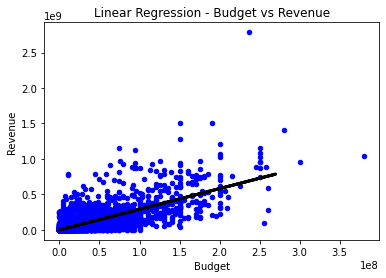

In [209]:
#A scatter plot of y vs. x linear regression 

plt.scatter(X_train,y_train, s=20, c='b', marker='o')
plt.plot(X_test, y_predict, color="black", linewidth=3)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Linear Regression - Budget vs Revenue')
plt.show()

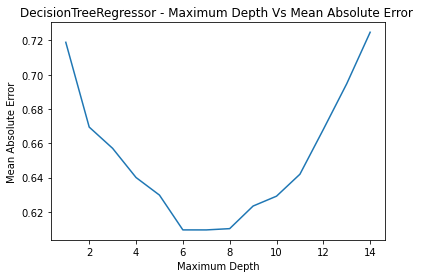

In [208]:
#Plot to show change in mean absolute error as maximum depth changes

plt.plot(depth, lst)
plt.title('DecisionTreeRegressor - Maximum Depth Vs Mean Absolute Error ')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Absolute Error')
plt.show()

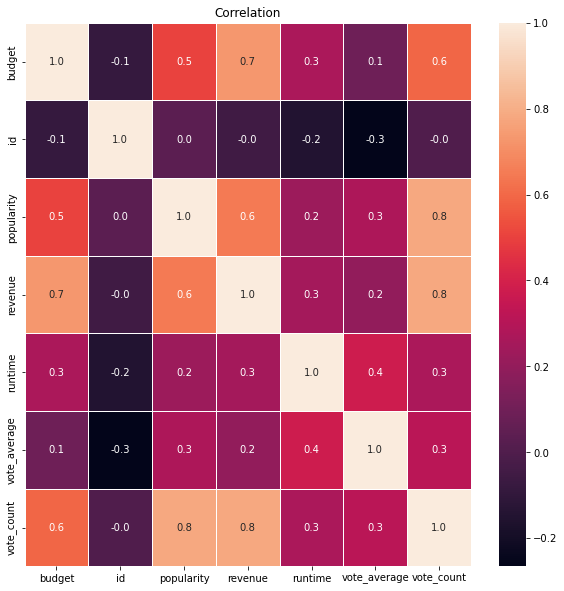

In [50]:
#Plot of rectangular data as a color-encoded matrix.

f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = '.1f', ax = ax)
plt.title('Correlation')
plt.show()